### 1. Importing the libraries and loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading each sheet into a DataFrame
excel_file = "Assignment.xlsx"
user_details = pd.read_excel(excel_file, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(excel_file, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(excel_file, sheet_name='OrderDetails.csv')

In [3]:
user_details.head(5)

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [4]:
cooking_sessions.head(5)

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [5]:
order_details.head(5)

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


### 2. Cleaning and Standardizing Data

In [6]:
# Renaming columns to ensure consistency
user_details.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
cooking_sessions.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)
order_details.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [12]:
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64
session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64
order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64


In [13]:
# Handle missing values
user_details.fillna({'age': user_details['age'].median()}, inplace=True)
cooking_sessions.dropna(inplace=True)
order_details.fillna({'quantity': 1}, inplace=True)

### 3. Merge Datasets

In [14]:
# Merging UserDetails with CookingSessions
merged_data = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')

# Merging with OrderDetailsb
final_data = pd.merge(merged_data, order_details, on='session_id', how='inner')

# Display merged dataset
final_data.head()

,user_id_x,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,session_rating,order_id,user_id_y,order_date,meal_type_y,dish_name_y,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [18]:
# Handling suffixes and removing duplicates
final_data.rename(columns={
    'user_id_x': 'user_id',       
    'meal_type_y': 'meal_type',   
    'dish_name_y': 'dish_name',  
}, inplace=True)

final_data.drop(columns=['user_id_y'], inplace=True)

In [19]:
final_data.head(5)

,user_id,user_name,age,location,registration_date,phone,email,favorite_meal,total_orders,session_id,...,duration_(mins),session_rating,order_id,order_date,meal_type,dish_name,order_status,amount_(usd),time_of_day,rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40,4.9,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20,4.0,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30,4.3,1006,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


### 4. Exploratory Data Analysis

#### 4.1 Analyze Conversion Rate

In [21]:
total_sessions = cooking_sessions['session_id'].nunique()
converted_sessions = final_data['session_id'].nunique()
conversion_rate = (converted_sessions / total_sessions) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 100.00%


#### 4.2 Identify Popular Dishes

In [22]:
popular_dishes = final_data['dish_name'].value_counts()
print("Top 5 Most Popular Dishes:")
print(popular_dishes.head())

Top 5 Most Popular Dishes:
dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Name: count, dtype: int64


#### 4.3 Explore Demographic Factors

In [24]:
# Orders by location
orders_by_location = final_data.groupby('location')['order_id'].count()

# Orders by age group (creating age bins)
final_data['age_group'] = pd.cut(final_data['age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])
orders_by_age_group = final_data.groupby('age_group')['order_id'].count()

print("Orders by Location:")
print(orders_by_location)

print("Orders by Age Group:")
print(orders_by_age_group)

Orders by Location:
location
Austin           1
Boston           1
Chicago          3
Los Angeles      3
Miami            1
New York         3
San Francisco    2
Seattle          2
Name: order_id, dtype: int64
Orders by Age Group:
age_group
<18      0
18-30    8
30-50    8
50+      0
Name: order_id, dtype: int64


C:\Users\karis\AppData\Local\Temp\ipykernel_38820\1526461887.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age_group = final_data.groupby('age_group')['order_id'].count()


### 5. Visualizations

#### 5.1 Popular Dishes

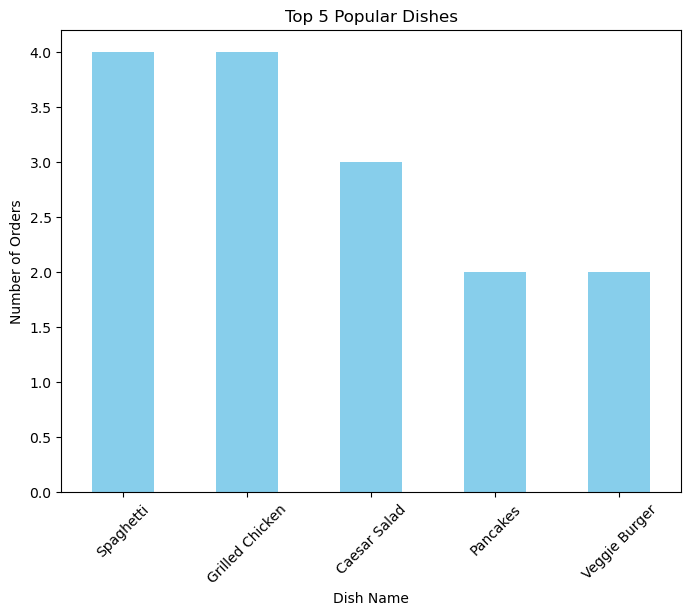

In [25]:
popular_dishes[:5].plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Top 5 Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### 5.2  Orders by Age Group

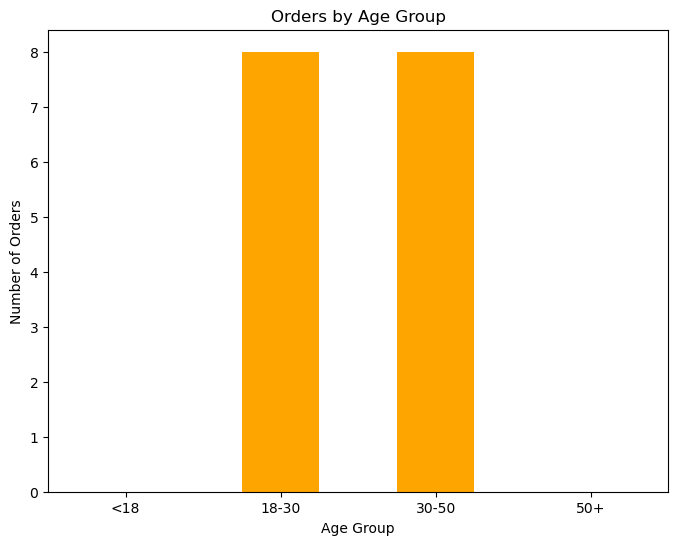

In [27]:
orders_by_age_group.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### 6. Insights and Recommendations 

#### Insights

1. **Perfect Conversion Rate**:
   - The platform achieved a **100% conversion rate**, with every cooking session leading to an order. This reflects a seamless integration between user cooking engagement and ordering behavior.

2. **Top 5 Dishes**:
   - The most frequently ordered dishes are:
     1. **Spaghetti**
     2. **Grilled Chicken**
     3. **Caesar Salad**
     4. **Pancakes**
     5. **Veggie Burger**
   - Spaghetti and Grilled Chicken are the most popular, demonstrating strong user preferences.

3. **Age Group Dynamics**:
   - Users aged **18-30** and **30-50** dominate the platform, contributing equally to order activity.
   - Engagement is significantly lower for users aged **under 18** and **over 50**, indicating potential areas for growth.

4. **Regional Order Trends**:
   - Cities like **New York**, **Chicago**, and **Los Angeles** lead in order volume.
   - Lower engagement is observed in locations such as **Austin**, **Miami**, and **Boston**, highlighting opportunities to drive adoption in these regions.


#### Recommendations

1. **Capitalize on Popular Dishes**:
   - Highlight **Spaghetti** and **Grilled Chicken** in promotions or meal bundles to maximize user interest and revenue.
   - Introduce premium versions or regional variations of these dishes to keep the menu fresh.

2. **Expand User Demographics**:
   - **Under-18 Users**:
     - Launch kid-friendly offerings, such as snack kits or fun meal prep activities.
     - Provide family-oriented discounts to encourage household-level engagement.
   - **50+ Users**:
     - Add health-conscious options, including low-sodium, gluten-free, or diabetic-friendly meals, to attract older users.

3. **Boost Engagement in Low-Order Cities**:
   - Run geo-targeted campaigns in **Austin**, **Miami**, and **Boston**, offering discounts or promotions for first-time users.
   - Introduce localized dishes or menu items based on regional tastes to resonate with these markets.

4. **Enhance User Retention**:
   - Implement a loyalty program that rewards users for frequent orders or consistent engagement with cooking sessions.
   - Offer "cook and earn" credits to incentivize users to continue converting cooking sessions into orders.

5. **Sustain the 100% Conversion Rate**:
   - Use personalized recommendations during cooking sessions to suggest additional orders (e.g., desserts or sides).